# Prepocessing of dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('netflix_movie.csv',lineterminator='\n')
df['Vote_Average'].describe()

count     9827
unique      75
top        6.4
freq       435
Name: Vote_Average, dtype: object

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [5]:
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


here we need to make
1. Dtype of Release_Date to "Date time" data type from object, dtype of Vote_Count to int, dtype of Vote_Average to float
2. Remove Overview
3. Remove Original_language
4. Remove Poster_Url

In [6]:
# Converting data type of Release_Date to datetime formate

df['Release_Date']=pd.to_datetime(df['Release_Date'], format='%Y-%m-%d', errors='coerce')
print(df['Release_Date'].dtype)

datetime64[ns]


In [7]:
df.duplicated().sum()

8

In [8]:
df=df.dropna()

In [9]:
df['Vote_Count']=df['Vote_Count'].astype(int)
df['Vote_Average']=df['Vote_Average'].astype(float)


In [10]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [11]:
# Removing certain columns which are of no use for us

df.drop(columns=['Overview','Original_Language','Poster_Url'],inplace=True)

In [12]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [13]:
# taking only year from Release_Date

df['Release_Date']=df['Release_Date'].dt.year

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  9826 non-null   int32  
 1   Title         9826 non-null   object 
 2   Popularity    9826 non-null   float64
 3   Vote_Count    9826 non-null   int32  
 4   Vote_Average  9826 non-null   float64
 5   Genre         9826 non-null   object 
dtypes: float64(2), int32(2), object(2)
memory usage: 460.6+ KB


In [15]:
df['Release_Date'].isnull().sum()

0

In [16]:
df.isnull().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [17]:
df = df.dropna()


In [18]:

df['Release_Date']=df['Release_Date'].astype(int)
print(df['Release_Date'].dtype)
df.head()

int32


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [19]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [20]:
df.duplicated().sum()

0

### catageorise *Vote_Average* column
we would get the vote_average column into **4 categories :** **popular, average, below_avg, not_popular** to describe them easily using **categorise_col** function.

In [21]:
# defining function

def categorize_col(df,col,labels):
    edges=[df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]
    df[col]=pd.cut(df[col],edges,labels=labels,duplicates='drop')
    return df
           

In [22]:
labels=['not_popular','below_avg','average','popular']
categorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [23]:
df['Vote_Average'].describe()

count            9726
unique              4
top       not_popular
freq             2467
Name: Vote_Average, dtype: object

In [24]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [25]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

# Split the genre into a list and the explode our dataframe to have only one genre per row

In [26]:
df['Genre']=df['Genre'].str.split(', ')

In [27]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"[Action, Adventure, Science Fiction]"
1,2022,The Batman,3827.658,1151,popular,"[Crime, Mystery, Thriller]"
2,2022,No Exit,2618.087,122,below_avg,[Thriller]
3,2021,Encanto,2402.201,5076,popular,"[Animation, Comedy, Family, Fantasy]"
4,2021,The King's Man,1895.511,1793,average,"[Action, Adventure, Thriller, War]"


In [28]:
df=df.explode('Genre').reset_index(drop=True)

In [29]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [30]:
df.describe()

,Release_Date,Popularity,Vote_Count
count,25792.000000,25792.000000,25792.000000
mean,2006.016051,42.000539,1504.881514
std,15.491212,113.343183,2743.047498
min,1902.000000,13.354000,0.000000
25%,2000.000000,16.365750,166.000000
50%,2011.000000,21.862000,490.000000
75%,2017.000000,36.503000,1501.000000
max,2024.000000,5083.954000,31077.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25792 non-null  int32   
 1   Title         25792 non-null  object  
 2   Popularity    25792 non-null  float64 
 3   Vote_Count    25792 non-null  int32   
 4   Vote_Average  25551 non-null  category
 5   Genre         25792 non-null  object  
dtypes: category(1), float64(1), int32(2), object(2)
memory usage: 831.5+ KB


In [32]:
df['Genre']=df['Genre'].astype('category')

# Data Visualization

In [33]:
sns.set_style('darkgrid')

### What is the most frequent Genre of Movies released on Netflix?

In [34]:
df['Genre'].describe()

count     25792
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

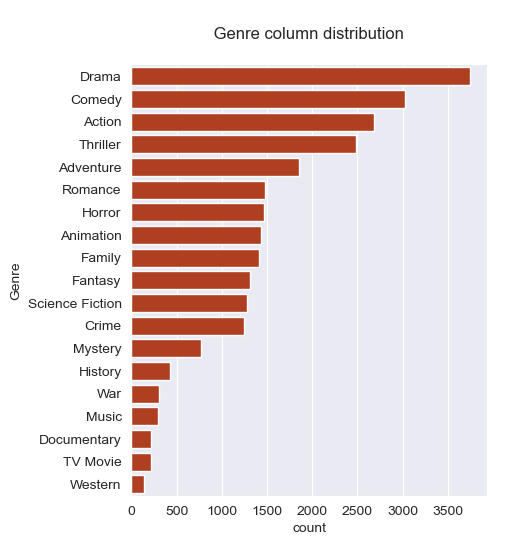

In [35]:
sns.catplot(y='Genre',data=df,kind='count',
            order=df['Genre'].value_counts().index,
            color='#C63108')

plt.title("\n Genre column distribution \n")
# plt.figure(figsize=(10, 15))
plt.show()

# Which has highest Votes in vote average column?

In [36]:
df1=pd .read_csv('netflix_movie.csv')

In [37]:
df1.drop(columns=['Overview','Original_Language','Poster_Url'],inplace=True)
df1.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [38]:
df1['Release_Date']=pd.to_datetime(df1['Release_Date'],format="%Y-%m-%d",errors='coerce')
df1.info()
df1.duplicated().sum()
df1.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release_Date  9827 non-null   datetime64[ns]
 1   Title         9828 non-null   object        
 2   Popularity    9827 non-null   float64       
 3   Vote_Count    9827 non-null   object        
 4   Vote_Average  9827 non-null   object        
 5   Genre         9826 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 461.2+ KB


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9832,1973-10-15,Badlands,13.357,896,7.6,"Drama, Crime"
9833,2020-10-01,Violent Delights,13.356,8,3.5,Horror
9834,2016-05-06,The Offering,13.355,94,5.0,"Mystery, Thriller, Horror"
9835,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History"


In [39]:
df1['Release_Date']=df1['Release_Date'].dt.year
df1=df1.dropna()
df1['Release_Date']=df1['Release_Date'].astype(int)

In [40]:
df1.head()
df1.info()
df1=df1.dropna()
df1.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  9826 non-null   int32  
 1   Title         9826 non-null   object 
 2   Popularity    9826 non-null   float64
 3   Vote_Count    9826 non-null   object 
 4   Vote_Average  9826 non-null   object 
 5   Genre         9826 non-null   object 
dtypes: float64(1), int32(1), object(4)
memory usage: 499.0+ KB


0

In [41]:
def categorize_col(df,col,labels):
    edges=[df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]
    df[col]=pd.cut(df[col],edges,labels=labels,duplicates='drop')
    return df
           

In [42]:
df1['Vote_Average']=df1['Vote_Average'].astype(float)
labels=['not_popular','below_avg','average','popular']
categorize_col(df1,'Vote_Average',labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9832,1973,Badlands,13.357,896,popular,"Drama, Crime"
9833,2020,Violent Delights,13.356,8,not_popular,Horror
9834,2016,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror"
9835,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


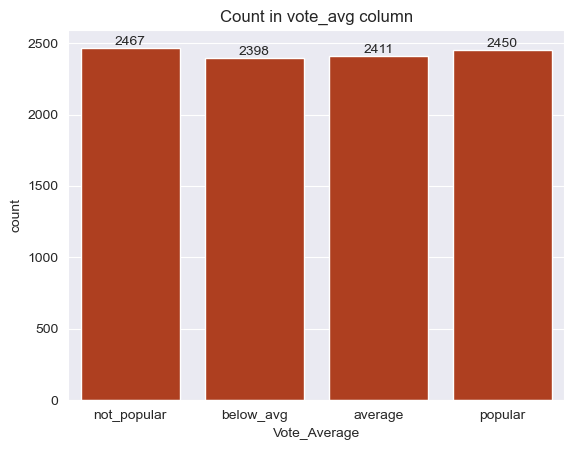

In [43]:
plot=sns.barplot(x='Vote_Average',y='count',data=df1['Vote_Average'].value_counts().reset_index(),color='#C63108')
plt.bar_label(plot.containers[0])
plt.title('Count in vote_avg column')
plt.show()

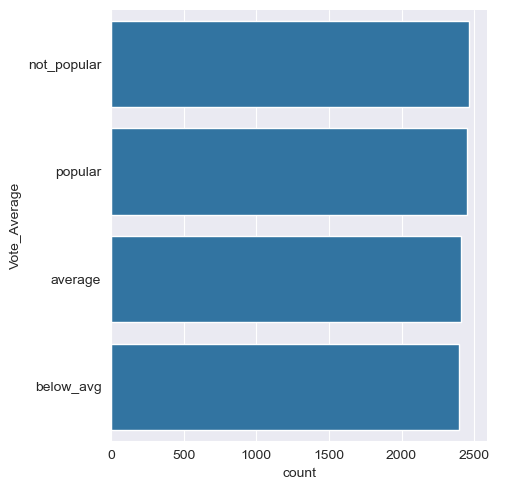

In [44]:
sns.catplot(y='Vote_Average',data=df1,kind='count',
            order=df1['Vote_Average'].value_counts().index)

# Which movie got the highest popularity? What it's Genre?

In [45]:
df1.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [46]:
df1[df1['Popularity']==df1['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"


# Which movie got the lowest popularity? What it's Genre?

In [47]:
df1[df1['Popularity']==df1['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
9835,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"
9836,1984,Threads,13.354,186,popular,"War, Drama, Science Fiction"


# Which year has most filmed movie

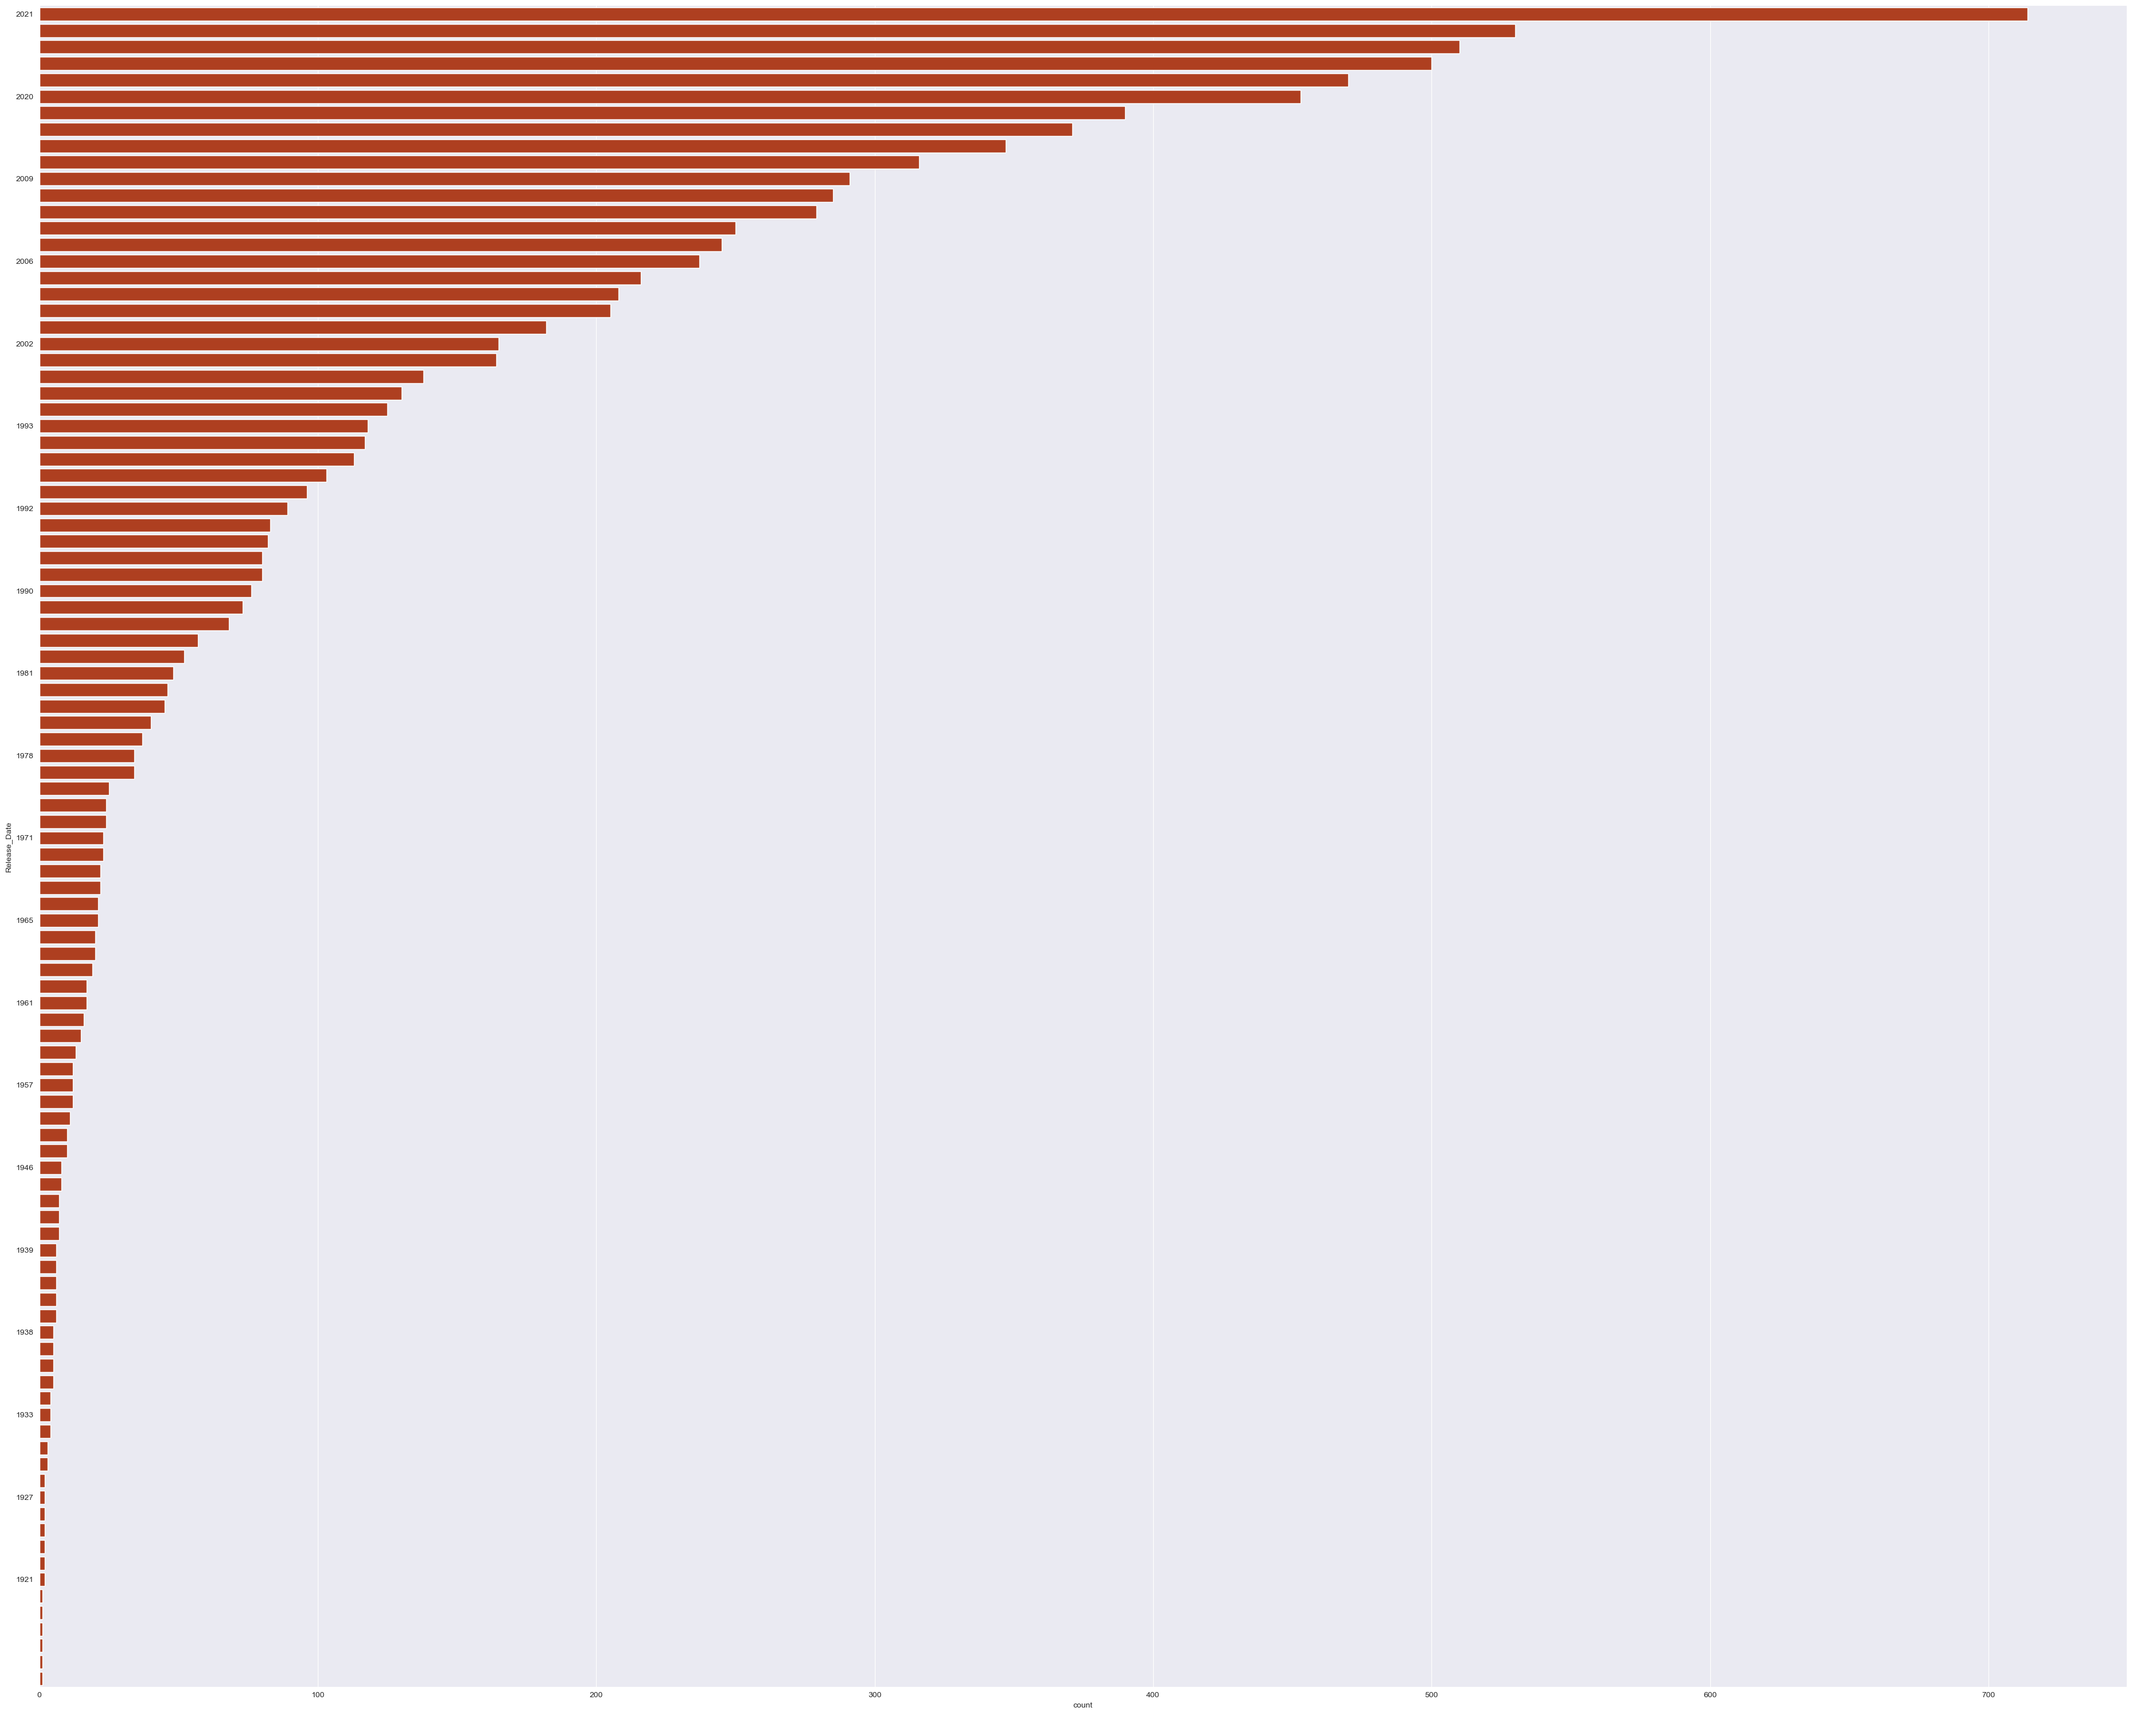

In [59]:
sns.catplot(y=df1['Release_Date'],data=df1,kind='count',
            order=df1['Release_Date'].value_counts().index,
           color='#C63108',height=30, aspect=1.25)
plt.yticks(range(0,100 , 5))  # Ticks at 0, 5, 10, ..., 50
plt.show()